In [1]:
import pandas as pd
import requests
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.ticker as ticker
import os
import time

In [2]:
my_key = os.environ.get('NASA_API_KEY')

In [2]:
def get_NEO_data(start=None, end=None):
    if not start:
        start = datetime.strftime(datetime.now() - timedelta(days=7), '%Y-%m-%d')
    if not end:
        end = datetime.strftime(datetime.now(), '%Y-%m-%d')
    url = 'https://api.nasa.gov/neo/rest/v1/feed?start_date={}&end_date={}&api_key={}'
    resp = requests.get(url.format(start, end, my_key))
    if resp.status_code != 200:
        if resp.status_code == 429:
            retry_time = int(resp.headers['Retry-After'])
            print('Rate limit reached. Retrying again after {} seconds...'.format(retry_time))
            time.sleep(retry_time)
            d = get_NEO_data(start=start, end=end)
        else:
            print(resp.status_code, resp.json()['error_message'])
    d = resp.json()
    if d['element_count'] == 0:
        start = input('No data available, please enter a start date (YYYY-MM-DD): ')
        end = input('Enter an end date (YYYY-MM-DD): ')
        d = get_NEO_data(start=start, end=end)
    return d

In [54]:
a = get_NEO_data(start='1000-09-08', end='1000-09-07')

No data available, please enter a start date (YYYY-MM-DD)2015-09-07
Enter an end date (YYYY-MM-DD)2015-09-08


In [55]:
a

{'links': {'next': 'https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-08&end_date=2015-09-09&detailed=false&api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE',
  'prev': 'https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-06&end_date=2015-09-07&detailed=false&api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE',
  'self': 'https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&detailed=false&api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE'},
 'element_count': 22,
 'near_earth_objects': {'2015-09-08': [{'links': {'self': 'https://api.nasa.gov/neo/rest/v1/neo/3726710?api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE'},
    'id': '3726710',
    'neo_reference_id': '3726710',
    'name': '(2015 RC)',
    'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3726710',
    'absolute_magnitude_h': 24.3,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0366906138,
      'estimated_diameter_max': 0.0820427065},
     'meters': {'estimated_d

In [54]:
start = datetime.strftime(datetime.now() - timedelta(days=7), '%Y-%m-%d')
end = datetime.strftime(datetime.now(), '%Y-%m-%d')

In [62]:
url = 'https://api.nasa.gov/neo/rest/v1/feed?start_date={}&end_date={}&api_key={}'.format(start, end, my_key)
d = requests.get(url).json()

In [63]:
d

{'links': {'next': 'https://api.nasa.gov/neo/rest/v1/feed?start_date=2019-02-08&end_date=2019-02-15&detailed=false&api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE',
  'prev': 'https://api.nasa.gov/neo/rest/v1/feed?start_date=2019-01-25&end_date=2019-02-01&detailed=false&api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE',
  'self': 'https://api.nasa.gov/neo/rest/v1/feed?start_date=2019-02-01&end_date=2019-02-08&detailed=false&api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE'},
 'element_count': 74,
 'near_earth_objects': {'2019-02-08': [{'links': {'self': 'https://api.nasa.gov/neo/rest/v1/neo/3837531?api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE'},
    'id': '3837531',
    'neo_reference_id': '3837531',
    'name': '(2018 YS2)',
    'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3837531',
    'absolute_magnitude_h': 24.4,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0350392641,
      'estimated_diameter_max': 0.0783501764},
     'meters': {'estimated_

In [64]:
d.keys()

dict_keys(['links', 'element_count', 'near_earth_objects'])

In [65]:
d['near_earth_objects'].keys()

dict_keys(['2019-02-08', '2019-02-07', '2019-02-06', '2019-02-05', '2019-02-04', '2019-02-03', '2019-02-02', '2019-02-01'])

In [67]:
from pprint import pprint
pprint(d['near_earth_objects']['2019-02-08'][0])

{'absolute_magnitude_h': 24.4,
 'close_approach_data': [{'close_approach_date': '2019-02-08',
                          'epoch_date_close_approach': 1549612800000,
                          'miss_distance': {'astronomical': '0.0818854996',
                                            'kilometers': '12249897',
                                            'lunar': '31.8534603119',
                                            'miles': '7611733'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '16931.2211122373',
                                                'kilometers_per_second': '4.7031169756',
                                                'miles_per_hour': '10520.4023627677'}}],
 'estimated_diameter': {'feet': {'estimated_diameter_max': 257.0543928497,
                                 'estimated_diameter_min': 114.9582192654},
                        'kilometers': {'estimated_diameter_max': 0.0783501764,
    

In [78]:
neos = d['near_earth_objects']

In [94]:
df = pd.DataFrame(columns=['id', 'close_approach_date', 'miles_from_earth', 'hazardous'])

In [95]:
for day in neos.keys():
    for neo in neos[day]:
        close_approach = neo['close_approach_data'][0]['close_approach_date']
        row = {'id': neo['id'],
               'close_approach_date': datetime.strptime(close_approach, '%Y-%m-%d'),
               'miles_from_earth': float(neo['close_approach_data'][0]['miss_distance']['miles']),
               'hazardous': neo['is_potentially_hazardous_asteroid']}
        df = df.append(row, ignore_index=True)

In [96]:
df[df.hazardous == True]

,id,close_approach_date,miles,hazardous
18,2163818,2019-02-06,22778424.0,True
20,3608618,2019-02-06,29427900.0,True
24,3831077,2019-02-05,40666060.0,True
28,3445070,2019-02-05,16579986.0,True
38,2208023,2019-02-04,41235536.0,True
39,3662584,2019-02-04,36721224.0,True
48,2445305,2019-02-03,36477408.0,True
64,3837596,2019-02-01,4177278.5,True
67,3720978,2019-02-01,46307680.0,True
69,3838139,2019-02-01,11035241.0,True


In [3]:
def hazard_df_builder(data):
    neos = data['near_earth_objects']
    df = pd.DataFrame(columns=['id', 'close_approach_date', 'miles_from_earth', 'hazardous'])
    for day in neos.keys():
        for neo in neos[day]:
            close_approach = neo['close_approach_data'][0]['close_approach_date']
            row = {'id': neo['id'],
                   'close_approach_date': datetime.strptime(close_approach, '%Y-%m-%d'),
                   'miles_from_earth': float(neo['close_approach_data'][0]['miss_distance']['miles']),
                   'hazardous': neo['is_potentially_hazardous_asteroid']}
            df = df.append(row, ignore_index=True)
    return df[df.hazardous == True][['id', 'close_approach_date', 'miles_from_earth']]

In [100]:
hazard_df_builder(get_NEO_data(start='2018-01-01', end='2019-01-01'))

400 Date Format Exception - Expected format (yyyy-mm-dd) - The Feed date limit is only 7 Days


KeyError: 'element_count'

In [103]:
start = datetime.strftime(datetime.now() - timedelta(days=8), '%Y-%m-%d')
end = datetime.strftime(datetime.now(), '%Y-%m-%d')
url = 'https://api.nasa.gov/neo/rest/v1/feed?start_date={}&end_date={}&api_key={}'.format(start, end, my_key)
d = requests.get(url).json()

In [206]:
abs(((datetime.datetime.now() - timedelta(days=8)) - datetime.datetime.now()).days)

9

In [82]:
e = datetime.now()

In [83]:
s = datetime.now() - timedelta(days=14)

In [60]:
s

datetime.datetime(2019, 1, 25, 21, 41, 31, 930581)

In [61]:
e

datetime.datetime(2019, 2, 8, 21, 41, 26, 322643)

In [4]:
def query_splitter(start, end):
    if not start and not end:
        return [{'s': None,'e': None}] 
    duration = abs((start - end).days)
    print(str(duration) + ' total days.')
    if duration > 7:
        query_dates = []
        rounds = duration // 7
        remaining = duration % 7
        print(str(rounds) + ' queries made and one query with ', str(remaining) + ' days.')
        temp_s = start
        temp_e = temp_s + timedelta(days=7)
        for r in range(0, rounds):
            query_dates.append({'s': datetime.strftime(temp_s, '%Y-%m-%d'),
                                'e': datetime.strftime(temp_e, '%Y-%m-%d')})
            temp_s = temp_e
            temp_e = temp_e + timedelta(days=7)
        if remaining != 0:
            last = temp_s + timedelta(days=remaining)
            query_dates.append({'s': datetime.strftime(temp_s, '%Y-%m-%d'),
                                'e': datetime.strftime(last, '%Y-%m-%d')})
    else:
        query_dates = [{'s': datetime.strftime(start, '%Y-%m-%d'),
                        'e': datetime.strftime(end, '%Y-%m-%d')}]
    return query_dates

In [140]:
query_splitter(None, None)

[{'s': None, 'e': None}]

In [141]:
query_splitter(s, e)

14 total days.
2 queries made and one query with  0 days.


[{'s': '2019-01-25', 'e': '2019-02-01'}, {'s': '2019-02-01', 'e': '2019-02-08'}]

In [220]:
s = datetime.datetime.now() - timedelta(days=7)
query_splitter(s, e)

7


[{'s': '2019-02-01', 'e': '2019-02-08'}]

In [213]:
s = datetime.datetime.now() - timedelta(days=31)
query_splitter(s, e)

31
4 3


[{'s': '2019-01-08', 'e': '2019-01-15'},
 {'s': '2019-01-15', 'e': '2019-01-22'},
 {'s': '2019-01-22', 'e': '2019-01-29'},
 {'s': '2019-01-29', 'e': '2019-02-05'},
 {'s': '2019-02-05', 'e': '2019-02-08'}]

In [214]:
s = datetime.datetime.now() - timedelta(days=38)
query_splitter(s, e)

38
5 3


[{'s': '2019-01-01', 'e': '2019-01-08'},
 {'s': '2019-01-08', 'e': '2019-01-15'},
 {'s': '2019-01-15', 'e': '2019-01-22'},
 {'s': '2019-01-22', 'e': '2019-01-29'},
 {'s': '2019-01-29', 'e': '2019-02-05'},
 {'s': '2019-02-05', 'e': '2019-02-08'}]

In [142]:
s = datetime.now() - timedelta(days=6916)
query_splitter(s, e)

6916 total days.
988 queries made and one query with  0 days.


[{'s': '2000-03-03', 'e': '2000-03-10'}, {'s': '2000-03-10', 'e': '2000-03-17'}, {'s': '2000-03-17', 'e': '2000-03-24'}, {'s': '2000-03-24', 'e': '2000-03-31'}, {'s': '2000-03-31', 'e': '2000-04-07'}, {'s': '2000-04-07', 'e': '2000-04-14'}, {'s': '2000-04-14', 'e': '2000-04-21'}, {'s': '2000-04-21', 'e': '2000-04-28'}, {'s': '2000-04-28', 'e': '2000-05-05'}, {'s': '2000-05-05', 'e': '2000-05-12'}, {'s': '2000-05-12', 'e': '2000-05-19'}, {'s': '2000-05-19', 'e': '2000-05-26'}, {'s': '2000-05-26', 'e': '2000-06-02'}, {'s': '2000-06-02', 'e': '2000-06-09'}, {'s': '2000-06-09', 'e': '2000-06-16'}, {'s': '2000-06-16', 'e': '2000-06-23'}, {'s': '2000-06-23', 'e': '2000-06-30'}, {'s': '2000-06-30', 'e': '2000-07-07'}, {'s': '2000-07-07', 'e': '2000-07-14'}, {'s': '2000-07-14', 'e': '2000-07-21'}, {'s': '2000-07-21', 'e': '2000-07-28'}, {'s': '2000-07-28', 'e': '2000-08-04'}, {'s': '2000-08-04', 'e': '2000-08-11'}, {'s': '2000-08-11', 'e': '2000-08-18'}, {'s': '2000-08-18', 'e': '2000-08-25'},

In [215]:
s = datetime.datetime.now() - timedelta(days=35)
query_splitter(s, e)

35
5 0


[{'s': '2019-01-04', 'e': '2019-01-11'},
 {'s': '2019-01-11', 'e': '2019-01-18'},
 {'s': '2019-01-18', 'e': '2019-01-25'},
 {'s': '2019-01-25', 'e': '2019-02-01'},
 {'s': '2019-02-01', 'e': '2019-02-08'}]

In [6]:
test = [{'s': '2019-01-04', 'e': '2019-01-11'},
 {'s': '2019-01-11', 'e': '2019-01-18'},
 {'s': '2019-01-18', 'e': '2019-01-25'},
 {'s': '2019-01-25', 'e': '2019-02-01'},
 {'s': '2019-02-01', 'e': '2019-02-08'}]

In [11]:
hazard_df_builder(get_NEO_data(start='2019-01-01', end='2019-01-08'))

,id,close_approach_date,miles
9,2436774,2019-01-08,42432920.0
11,3025766,2019-01-08,9493952.0
22,3739246,2019-01-07,2767865.0
35,2267729,2019-01-05,23139924.0
36,2352102,2019-01-05,45318632.0
49,3263453,2019-01-04,6796124.5
67,2357022,2019-01-03,30229926.0
86,3398652,2019-01-01,7109101.5


In [12]:
dfs = []
for t in test:  
    dfs.append(hazard_df_builder(get_NEO_data(start=t['s'], end=t['e'])))
    
five_weeks_of_hazards = pd.concat(dfs, ignore_index=True)

In [13]:
five_weeks_of_hazards

,id,close_approach_date,miles
0,2458122,2019-01-09,41136352.00
1,2436774,2019-01-08,42432920.00
2,3025766,2019-01-08,9493952.00
3,3739246,2019-01-07,2767865.00
4,2267729,2019-01-05,23139924.00
5,2352102,2019-01-05,45318632.00
6,3263453,2019-01-04,6796124.50
7,3678629,2019-01-11,32171036.00
8,3836308,2019-01-11,11322066.00
9,3145520,2019-01-18,12327100.00


In [145]:
url = 'https://api.nasa.gov/neo/rest/v1/feed?start_date={}&end_date={}&api_key={}'
resp = requests.get(url.format(start, end, my_key))

In [146]:
int(resp.headers['X-RateLimit-Remaining'])

32

In [37]:
get_NEO_data(start=start, end=end)

{'links': {'next': 'https://api.nasa.gov/neo/rest/v1/feed?start_date=2019-02-08&end_date=2019-02-15&detailed=false&api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE', 'prev': 'https://api.nasa.gov/neo/rest/v1/feed?start_date=2019-01-25&end_date=2019-02-01&detailed=false&api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE', 'self': 'https://api.nasa.gov/neo/rest/v1/feed?start_date=2019-02-01&end_date=2019-02-08&detailed=false&api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE'}, 'element_count': 74, 'near_earth_objects': {'2019-02-08': [{'links': {'self': 'https://api.nasa.gov/neo/rest/v1/neo/3837531?api_key=lM2QxaXmchj3DykheZyie9CdtTehYmAjuVQidutE'}, 'id': '3837531', 'neo_reference_id': '3837531', 'name': '(2018 YS2)', 'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3837531', 'absolute_magnitude_h': 24.4, 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0350392641, 'estimated_diameter_max': 0.0783501764}, 'meters': {'estimated_diameter_min': 35.0392641108, 'estimated_

In [38]:
rate_limit

985

In [86]:
today = datetime.strftime(datetime.now(), '%Y-%m-%d')

In [87]:
today

'2019-02-08'

In [97]:
test(start='', end='')

hi


In [5]:
def etl_pipeline(start=None, end=None):
    if start is not None and end is not None:
        start = datetime.strptime(start, '%Y-%m-%d')
        end = datetime.strptime(end, '%Y-%m-%d')
    queries = query_splitter(start, end)
    dfs = []
    for q in queries:
        chunk = get_NEO_data(start=q['s'], end=q['e'])
        dfs.append(hazard_df_builder(chunk))
    return pd.concat(dfs, ignore_index=True)

In [103]:
eighteen_years = etl_pipeline(start='2019-01-25', end=today)

6916 total days.
988 queries made and one query with  0 days.


In [124]:
eighteen_years.drop_duplicates(inplace=True)

In [125]:
eighteen_years.to_csv('NASA_NEOs_2019-01-25_to_2037-12-31', index=False)

In [6]:
eighteen_years = pd.read_csv('NASA_NEOs_2019-01-25_to_2037-12-31')

In [7]:
eighteen_years.head()

,id,close_approach_date,miles_from_earth
0,3838082,2019-01-29,2261166.25
1,3674578,2019-01-29,45479116.00
2,3266505,2019-01-29,41186188.00
3,2194268,2019-01-28,34489776.00
4,2375054,2019-01-27,12722163.00


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


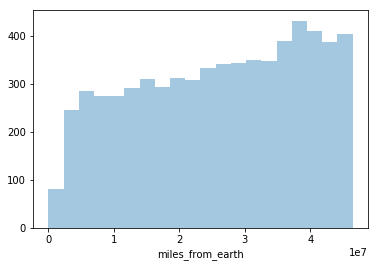

In [8]:
sns.distplot(eighteen_years.miles_from_earth, kde=False)

In [9]:
eighteen_years['close_approach_date'].max()

'2037-12-31'

In [10]:
eighteen_years['close_approach_date'].min()

'2019-01-25'

In [39]:
eighteen_years['year'] = pd.DatetimeIndex(eighteen_years.close_approach_date).year
eighteen_years['month'] = pd.DatetimeIndex(eighteen_years.close_approach_date).month
eighteen_years['date'] = pd.DatetimeIndex(eighteen_years.close_approach_date).date

In [15]:
eighteen_years.head()

,id,close_approach_date,miles_from_earth,year,month
0,3838082,2019-01-29,2261166.25,2019,1
1,3674578,2019-01-29,45479116.00,2019,1
2,3266505,2019-01-29,41186188.00,2019,1
3,2194268,2019-01-28,34489776.00,2019,1
4,2375054,2019-01-27,12722163.00,2019,1


In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [43]:
yearly_neos = eighteen_years.groupby('year').id.count()

In [159]:
yearly_closest = eighteen_years.groupby('year').miles_from_earth.min()

In [44]:
years = sorted(eighteen_years.year.unique())

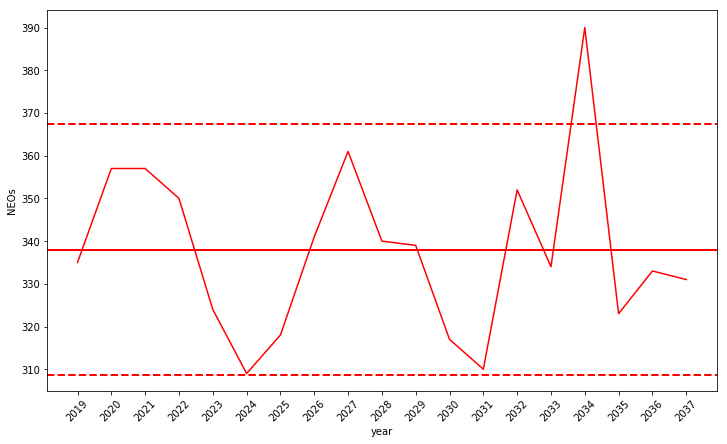

In [181]:
md = yearly_neos.mean()
sd = np.std(yearly_neos)

plt.figure(figsize=(12,7));
yearly_neos.plot.line(color='r')
plt.axhline(md, color='r', linestyle='solid', linewidth=2)
plt.axhline(md + 1.5 * sd, color='r', linestyle='dashed', linewidth=2)
plt.axhline(md - 1.5 * sd, color='r', linestyle='dashed', linewidth=2)
plt.xticks(years,rotation=45);
plt.ylabel('NEOs');

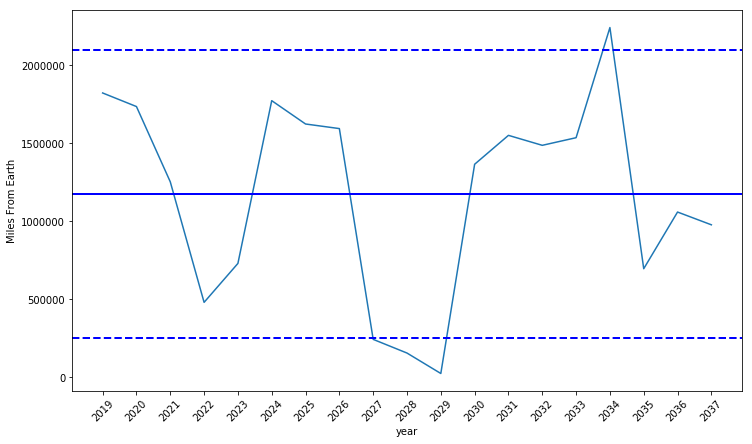

In [182]:
md = yearly_closest.mean()
sd = np.std(yearly_closest)

plt.figure(figsize=(12,7));
yearly_closest.plot.line()
plt.axhline(md, color='b', linestyle='solid', linewidth=2)
plt.axhline(md + 1.5 * sd, color='b', linestyle='dashed', linewidth=2)
plt.axhline(md - 1.5 * sd, color='b', linestyle='dashed', linewidth=2)
plt.xticks(years,rotation=45);
plt.ylabel('Miles From Earth');

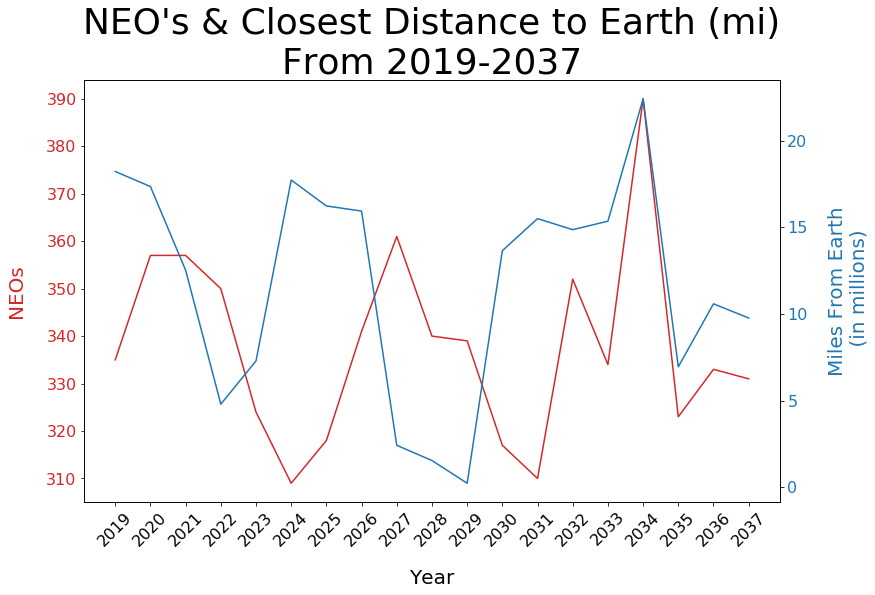

In [207]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year', size=20, labelpad=20)
ax1.set_ylabel('NEOs', color=color, size=20, labelpad=20)
ax1.plot(years, yearly_neos, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
scale_y = 1e5
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax2.yaxis.set_major_formatter(ticks_y)
ax2.set_ylabel('Miles From Earth\n (in millions)', color=color,
                size=20, labelpad=20)
ax2.plot(years, yearly_closest, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(years, rotation=45, fontsize=16)
    plt.yticks(fontsize=16)
plt.title('NEO\'s & Closest Distance to Earth (mi)\nFrom 2019-2037', size=36)
plt.show()

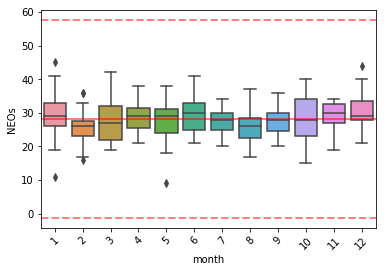

In [68]:
monthly_neos = eighteen_years.groupby(['year', 'month']).id.count().reset_index()
plt.xticks(years,rotation=45);
md = monthly_neos.id.mean()
plt.axhline(md, color='r', linestyle='solid', linewidth=2, alpha=.5)
plt.axhline(md + 1.5 * sd, color='r', linestyle='dashed', linewidth=2, alpha=.5)
plt.axhline(md - 1.5 * sd, color='r', linestyle='dashed', linewidth=2, alpha=.5)
sns.boxplot(x = monthly_neos.month, y = monthly_neos.id);
plt.ylabel('NEOs');